In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import math
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt
from torchviz import make_dot

from train import create_dataloader
from model import Discriminator, Generator

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dataloader = create_dataloader(128, 48, True, 0)

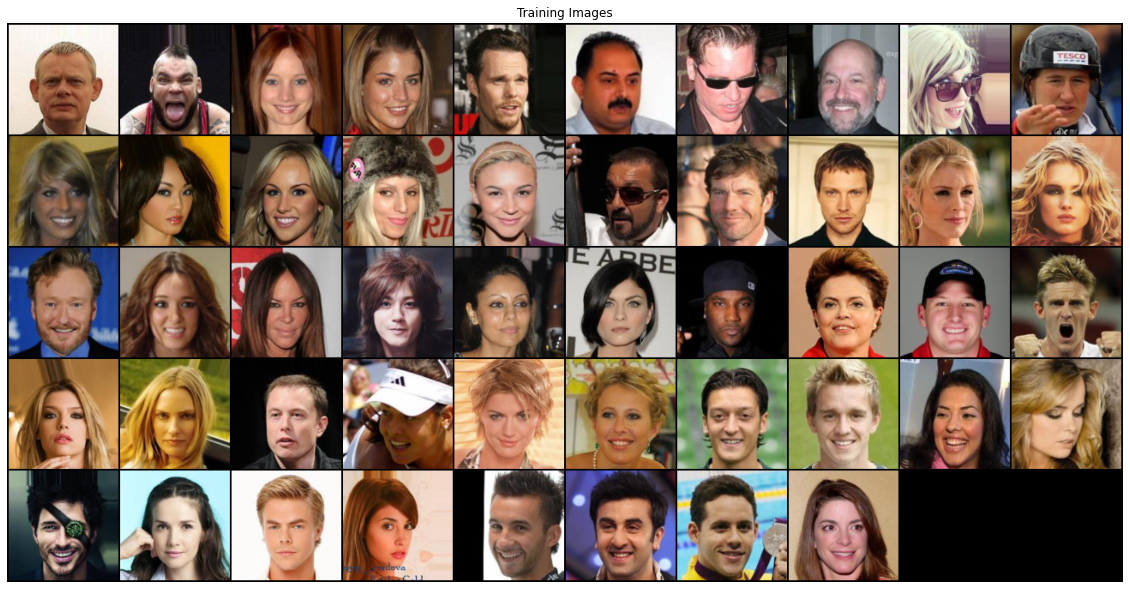

In [4]:
real_batch = next(iter(dataloader))

plt.figure(figsize=(20, 20))
plt.axis("off")
plt.title("Training Images")
plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(
            real_batch[0].to(device),
            padding=2,
            normalize=True,
            nrow=10
        ).cpu(),
        (1,2,0)
    )
)
plt.show()

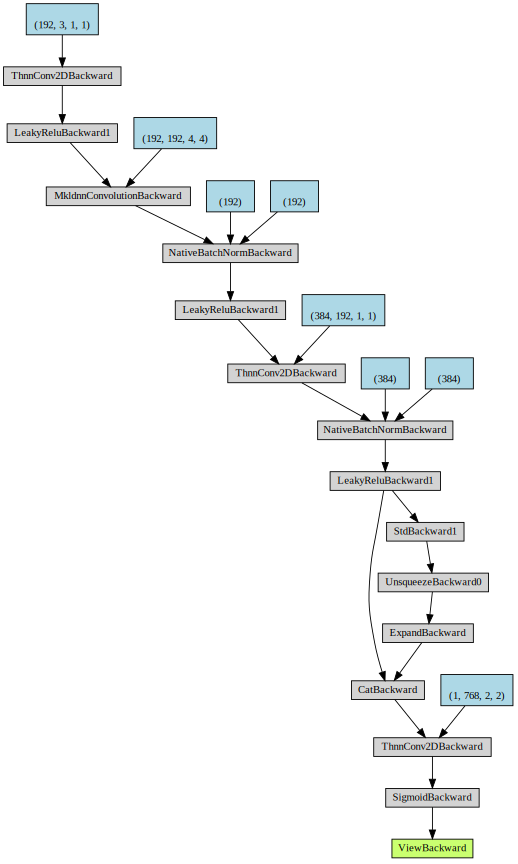

In [5]:
netD = Discriminator(ndf=6, nc=3, image_size=128, max_levels=6)
out = netD(torch.zeros(1, 3, 4, 4), level=1)
make_dot(out)

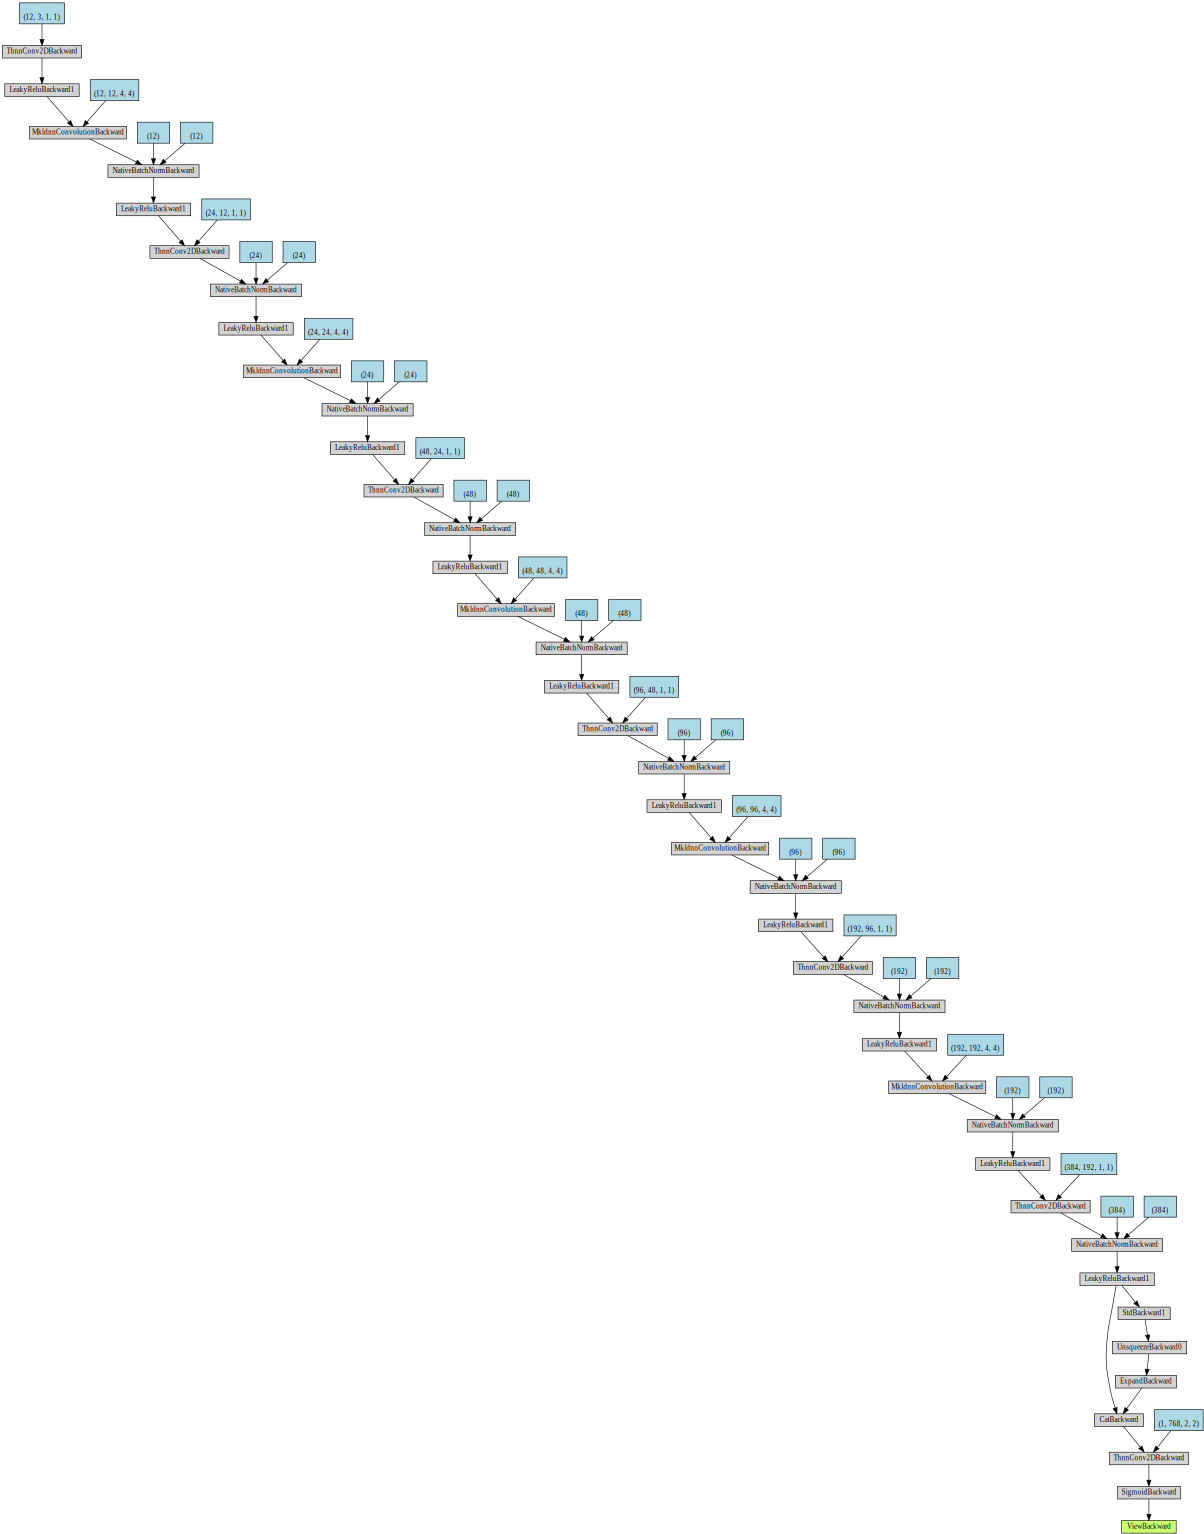

In [6]:
out = netD(torch.zeros(1, 3, 64, 64), level=5)
make_dot(out)

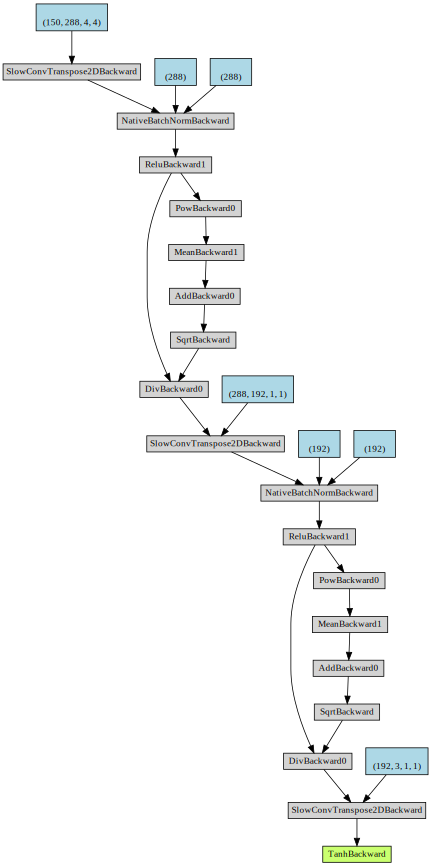

In [7]:
netG = Generator(nz=150, ngf=6, nc=3, image_size=128, max_levels=6)
out = netG(torch.zeros(1, 150, 1, 1), level=1)
make_dot(out)

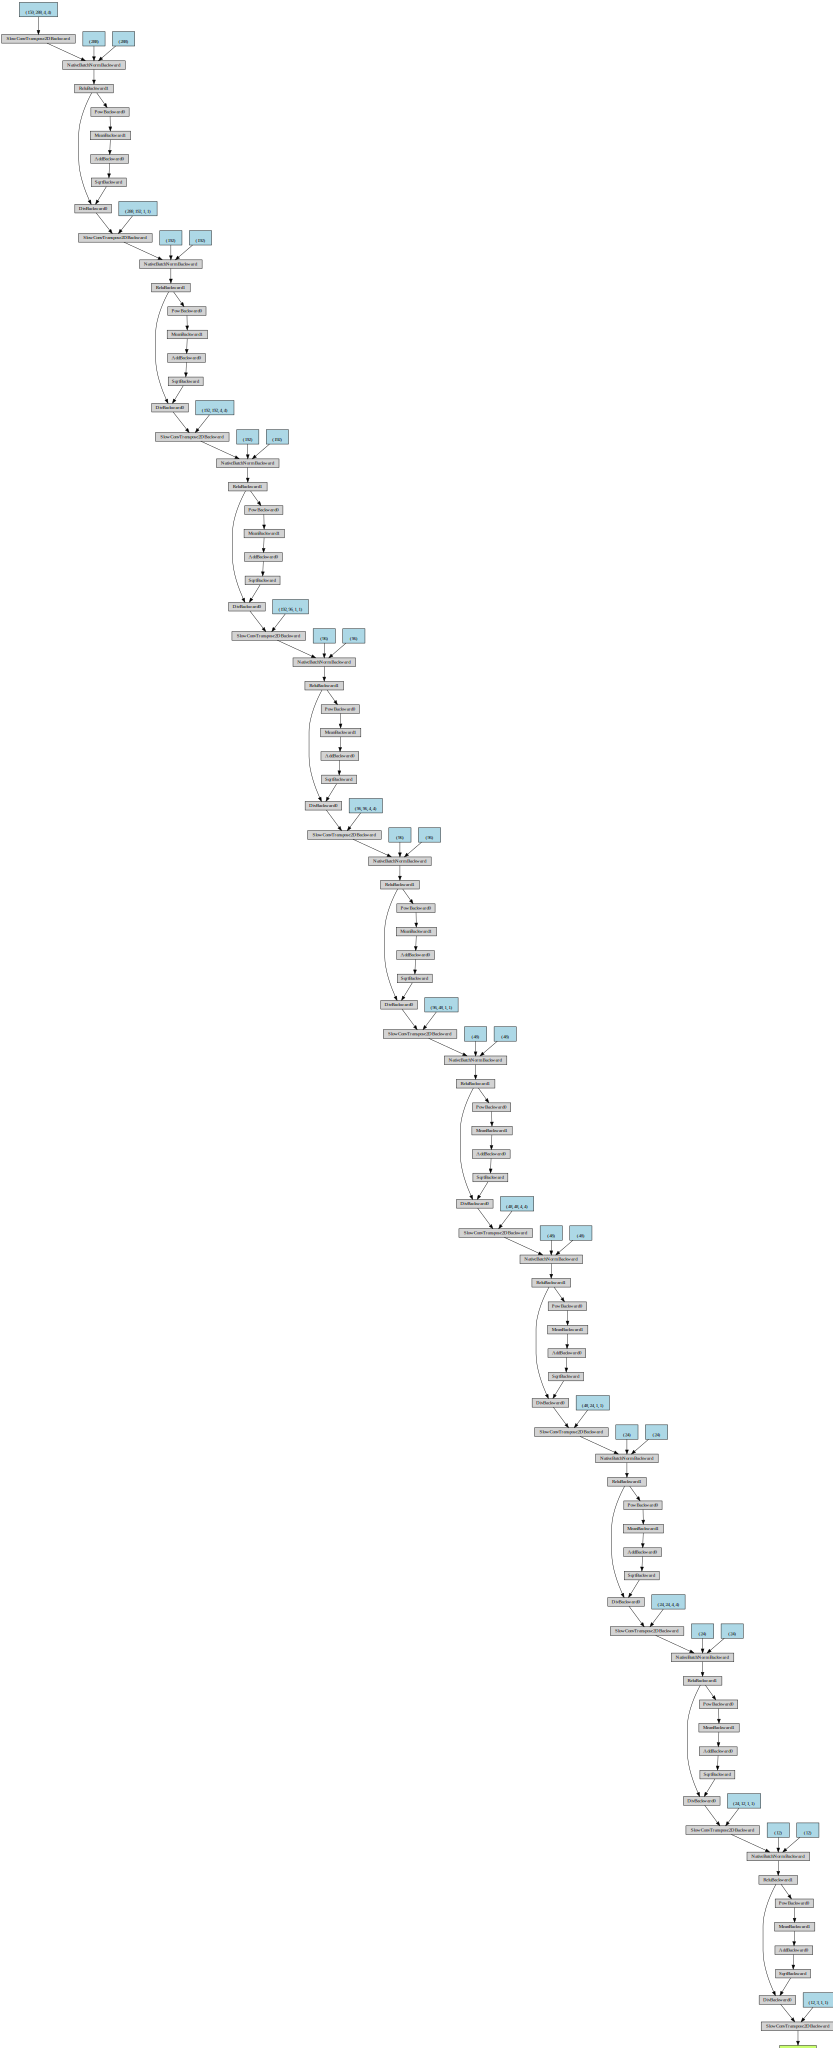

In [9]:
out = netG(torch.zeros(1, 150, 1, 1), level=5)
make_dot(out)

In [23]:
def test(max_levels: int = 6, batch_size: int = 48, nz: int = 150):
    for i in np.arange(1.00009, max_levels + 0.2, 0.1):
        rounded_level = min(int(math.ceil(i)), max_levels)
        size = 4 * (2 ** (rounded_level - 1))
        out = netG(torch.zeros(batch_size, nz, 1, 1), level=i)
        expected = (batch_size, 3, size, size)
        assert out.shape == expected, f"G Output Shape={out.shape}"
        valid = netD(out, level=i)
        assert valid.shape == (batch_size, 1), f"D Output Shape={valid.shape}"
        print(f"Verified Size {size} x {size} @ Level {i}")
test()

Verified Size 8 x 8 @ Level 1.00009
Verified Size 8 x 8 @ Level 1.10009
Verified Size 8 x 8 @ Level 1.20009
Verified Size 8 x 8 @ Level 1.3000900000000002
Verified Size 8 x 8 @ Level 1.4000900000000003
Verified Size 8 x 8 @ Level 1.5000900000000004
Verified Size 8 x 8 @ Level 1.6000900000000005
Verified Size 8 x 8 @ Level 1.7000900000000005
Verified Size 8 x 8 @ Level 1.8000900000000006
Verified Size 8 x 8 @ Level 1.9000900000000007
Verified Size 16 x 16 @ Level 2.000090000000001
Verified Size 16 x 16 @ Level 2.1000900000000007
Verified Size 16 x 16 @ Level 2.200090000000001
Verified Size 16 x 16 @ Level 2.300090000000001
Verified Size 16 x 16 @ Level 2.4000900000000014
Verified Size 16 x 16 @ Level 2.500090000000001
Verified Size 16 x 16 @ Level 2.6000900000000016
Verified Size 16 x 16 @ Level 2.700090000000001
Verified Size 16 x 16 @ Level 2.8000900000000017
Verified Size 16 x 16 @ Level 2.9000900000000014
Verified Size 32 x 32 @ Level 3.000090000000002
Verified Size 32 x 32 @ Level 